In [116]:
#importing data and dependencies
import pandas as pd
import numpy as np


#data frame 
df = pd.read_csv("/home/hcp_0/Downloads/NFLX.csv")
df['Date']=pd.to_datetime(df['Date'],format='%Y-%m-%d')
df.set_index("Date")


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900
...,...,...,...,...,...,...
2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000


In [117]:
#Analysing the data
df.describe()


,Open,High,Low,Close,Adj Close,Volume
count,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1.009000e+03
mean,419.059673,425.320703,412.374044,419.000733,419.000733,7.570685e+06
std,108.537532,109.262960,107.555867,108.289999,108.289999,5.465535e+06
min,233.919998,250.649994,231.229996,233.880005,233.880005,1.144000e+06
25%,331.489990,336.299988,326.000000,331.619995,331.619995,4.091900e+06
50%,377.769989,383.010010,370.880005,378.670013,378.670013,5.934500e+06
75%,509.130005,515.630005,502.529999,509.079987,509.079987,9.322400e+06
max,692.349976,700.989990,686.090027,691.690002,691.690002,5.890430e+07


In [118]:
#our output variable is Adj close so all other things will be our features
#Now creating a dataframe for features and output seperately

features = ['Open' , 'High','Low','Volume']
Y = pd.DataFrame(data = df["Adj Close"])
Y.head()


,Adj Close
0,254.259995
1,265.720001
2,264.559998
3,250.100006
4,249.470001


In [119]:
#Normalising the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_scaled = scaler.fit_transform(df[features])
X_scaled.shape

(1009, 4)

In [120]:
#creating the features dataframe
X_df = pd.DataFrame(columns=features,data=X_scaled,index=df['Date'])
X_df.head()


,Open,High,Low,Volume
Date,,,,
2018-02-05,-1.447772,-1.441465,-1.510141,0.791791
2018-02-06,-1.579589,-1.452453,-1.556931,0.919875
2018-02-07,-1.405553,-1.399802,-1.377121,0.258257
2018-02-08,-1.400944,-1.444029,-1.510420,0.317787
2018-02-09,-1.522898,-1.552262,-1.639627,1.709045


In [121]:
#Principal component Analysis

from sklearn.decomposition import PCA

pca = PCA(0.9)       #Holding 90 percent of the important features

X_pca = pca.fit_transform(X_df)               #non important columns features will be removed
X_pca


array([[-2.66048334, -0.02676599],
       [-2.80409326,  0.06203552],
       [-2.37706248, -0.4975146 ],
       ...,
       [-0.02770183,  1.29631768],
       [-0.14112111,  0.40558728],
       [-0.21500473, -0.02814286]])

In [122]:
#getting the eigen values of the principal components or variance ratio
pca.explained_variance_ratio_

array([0.8074882 , 0.19188088])

In [123]:
# converting the numpy ndarray to pd datafram
X_pca_df = pd.DataFrame(data=X_pca,columns=['PC1','PC2'],index=df['Date'])
X_pca_df.tail()


,PC1,PC2
Date,,
2022-01-31,-0.849839,2.127750
2022-02-01,-0.538896,2.708598
2022-02-02,-0.027702,1.296318
2022-02-03,-0.141121,0.405587
2022-02-04,-0.215005,-0.028143


In [124]:
#splitting the data

X_train = X_pca_df.loc['2018-02-05':'2021-12-31']
X_test = X_pca_df.loc['2022-01-01':'2022-02-04']
Y_train = Y.loc[0:984]
Y_test = Y.loc[985:1008]

In [131]:
#builfing the model


from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(max_depth=25 , random_state=42 , n_estimators=150)
model.fit(X_train,Y_train.values.ravel())


RandomForestRegressor(max_depth=25, n_estimators=150, random_state=42)

In [132]:
#scores

model_train_metrics = model.score(X_train,Y_train)
model_test_metrics = model.score(X_test,Y_test)
print(model_train_metrics)
print(model_test_metrics)

0.9992079585042316
0.9278112360169359


In [141]:
predicted_close = model.predict(X_test)

#Predicted vs Actual
Actual_temp= df.loc[985:1008]

Prediction_df = pd.DataFrame()
Prediction_df['Date'] = Actual_temp['Date']
Prediction_df['Actual Adj Close'] = Y_test
Prediction_df['Predicted Adj Close'] = predicted_close

Prediction_df.set_index('Date')

,Actual Adj Close,Predicted Adj Close
Date,,
2022-01-03,597.369995,604.569525
2022-01-04,591.150024,589.896860
2022-01-05,567.520020,578.928396
2022-01-06,553.289978,548.350678
2022-01-07,541.059998,544.112411
2022-01-10,539.849976,533.136408
2022-01-11,540.840027,539.635798
2022-01-12,537.219971,542.402793
2022-01-13,519.200012,536.211879


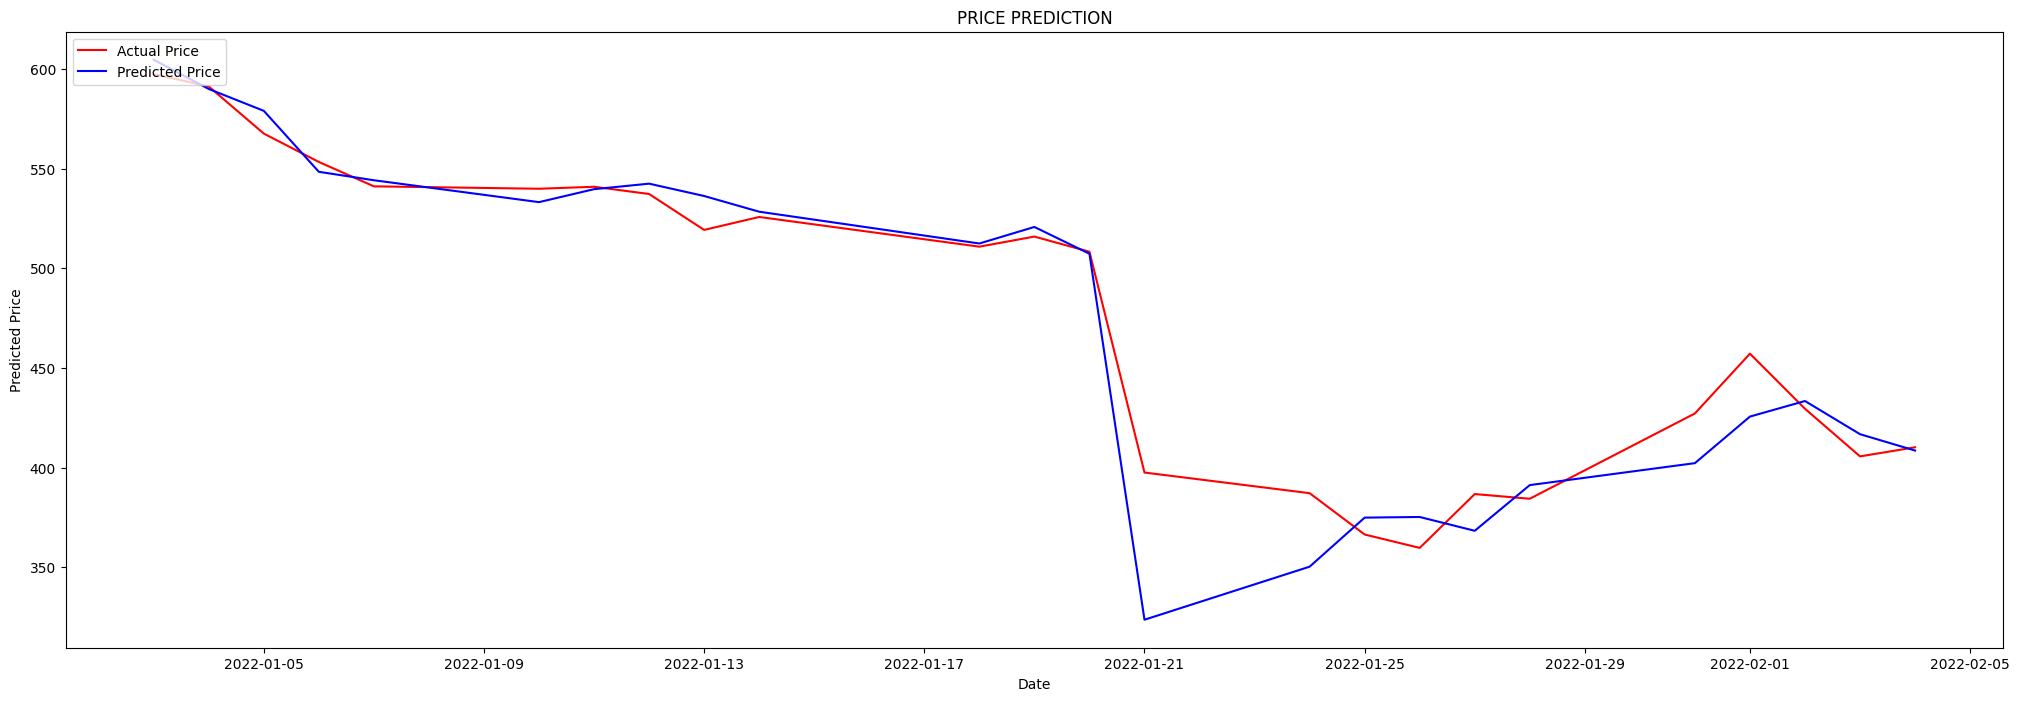

In [146]:
import matplotlib.pyplot as plt

plt.subplots(figsize=(25, 8))
plt.title("PRICE PREDICTION")
plt.plot(Prediction_df['Date'] , Prediction_df['Actual Adj Close'], color='red', linestyle='solid',  label = 'Actual Price')
plt.plot(Prediction_df['Date'] ,Prediction_df['Predicted Adj Close'], color='blue', linestyle='solid', label = 'Predicted Price')
plt.xlabel("Date")
plt.ylabel("Predicted Price")
plt.legend(loc="upper left")
plt.show()

